# Data Processing Flowchart
## Major Steps in Groundwater-Streamflow Analysis

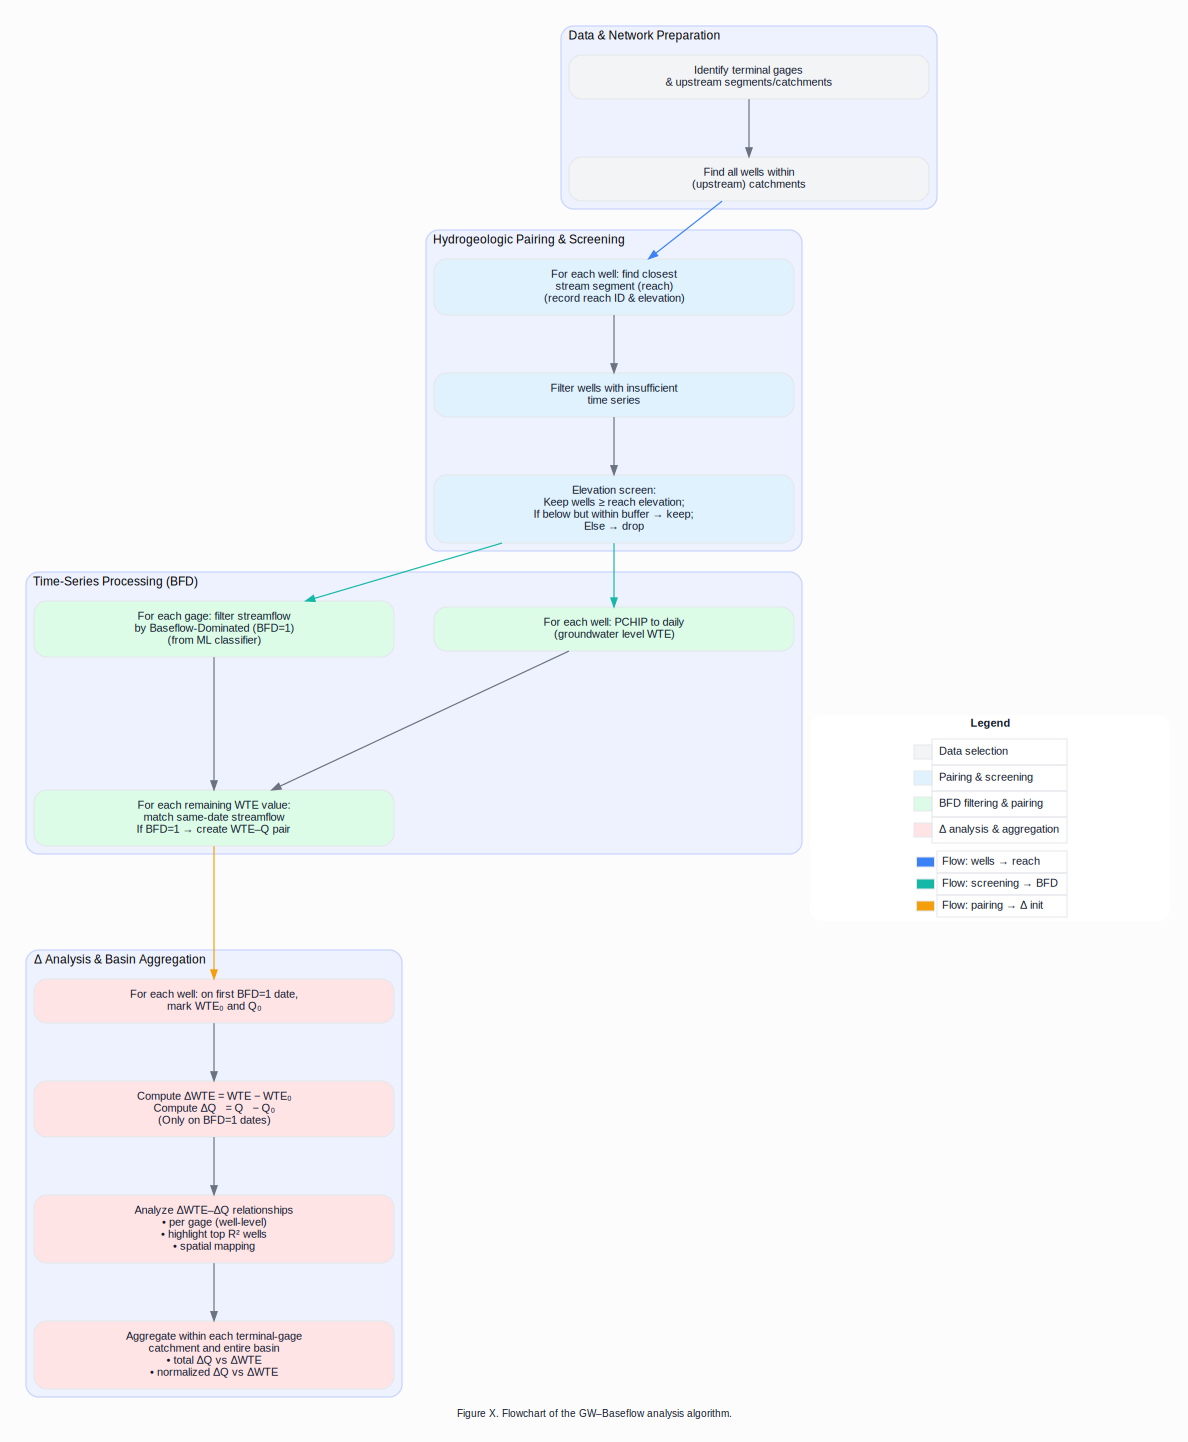

Saved: gwbase_flowchart.svg
Saved: gwbase_flowchart.png


In [16]:
# -*- coding: utf-8 -*-
# Flowchart for GW–Baseflow Algorithm
# Display inline (SVG) AND save to files (SVG/PNG).
# Legend uses color swatches and is placed to the right of the flowchart.

from graphviz import Digraph
from IPython.display import display, SVG

from graphviz import Digraph
from IPython.display import display, SVG

def make_flowchart(format_primary: str = "svg", basename: str = "gwbase_flowchart"):
    # --- Color palette ---
    C = {
        "bg":      "#fcfcfd",
        "edge":    "#6b7280",
        "text":    "#0f172a",
        "box":     "#ffffff",
        "phase":   "#eef2ff",
        "blue":    "#3b82f6",
        "teal":    "#14b8a6",
        "amber":   "#f59e0b",
        "gray":    "#f3f4f6",
        "pair":    "#e0f2fe",
        "bfd":     "#dcfce7",
        "delta":   "#ffe4e6",
    }

    g = Digraph("GWBASE_Flowchart", format="svg")
    g.attr(rankdir="TB", splines="spline", pad="0.25", bgcolor=C["bg"], fontname="Helvetica",
           nodesep="0.55", ranksep="0.8")

    g.attr(
        "node",
        shape="box",
        style="rounded,filled",
        color="#e5e7eb",
        penwidth="1.2",
        fontname="Helvetica",
        fontsize="11",
        fontcolor=C["text"],
        fillcolor=C["box"],
        margin="0.18,0.14",
        width="5.0",
        leading="1.2"
    )
    g.attr("edge", color=C["edge"], penwidth="1.2", arrowsize="0.9")

    with g.subgraph(name="cluster_prep") as p:
        p.attr(label="Data & Network Preparation", labelloc="t", labeljust="l",
               style="rounded,filled", color="#c7d2fe", fillcolor=C["phase"], penwidth="1.2", fontsize="12")
        p.node("S1", "Identify terminal gages\n& upstream segments/catchments", fillcolor=C["gray"])
        p.node("S2", "Find all wells within\n(upstream) catchments", fillcolor=C["gray"])
        p.edge("S1", "S2")

    with g.subgraph(name="cluster_link") as p:
        p.attr(label="Hydrogeologic Pairing & Screening", labelloc="t", labeljust="l",
               style="rounded,filled", color="#c7d2fe", fillcolor=C["phase"], penwidth="1.2", fontsize="12")
        p.node("S3", "For each well: find closest\nstream segment (reach)\n(record reach ID & elevation)", fillcolor=C["pair"])
        p.node("S4", "Filter wells with insufficient\ntime series", fillcolor=C["pair"])
        p.node("S5", "Elevation screen:\nKeep wells ≥ reach elevation;\nIf below but within buffer → keep;\nElse → drop", fillcolor=C["pair"])
        p.edge("S3", "S4")
        p.edge("S4", "S5")

    with g.subgraph(name="cluster_ts") as p:
        p.attr(label="Time-Series Processing (BFD)", labelloc="t", labeljust="l",
               style="rounded,filled", color="#c7d2fe", fillcolor=C["phase"], penwidth="1.2", fontsize="12")
        p.node("S6", "For each well: PCHIP to daily\n(groundwater level WTE)", fillcolor=C["bfd"])
        p.node("S7", "For each gage: filter streamflow\nby Baseflow-Dominated (BFD=1)\n(from ML classifier)", fillcolor=C["bfd"])
        p.node("S8", "For each remaining WTE value:\nmatch same-date streamflow\nIf BFD=1 → create WTE–Q pair", fillcolor=C["bfd"])
        p.edge("S6", "S8")
        p.edge("S7", "S8")

    with g.subgraph(name="cluster_delta") as p:
        p.attr(label="Δ Analysis & Basin Aggregation", labelloc="t", labeljust="l",
               style="rounded,filled", color="#c7d2fe", fillcolor=C["phase"], penwidth="1.2", fontsize="12")
        p.node("S9",  "For each well: on first BFD=1 date,\nmark WTE₀ and Q₀", fillcolor=C["delta"])
        p.node("S10", "Compute ΔWTE = WTE − WTE₀\nCompute ΔQ   = Q   − Q₀\n(Only on BFD=1 dates)", fillcolor=C["delta"])
        p.node("S11", "Analyze ΔWTE–ΔQ relationships\n• per gage (well-level)\n• highlight top R² wells\n• spatial mapping", fillcolor=C["delta"])
        p.node("S12", "Aggregate within each terminal-gage\ncatchment and entire basin\n• total ΔQ vs ΔWTE\n• normalized ΔQ vs ΔWTE", fillcolor=C["delta"])
        p.edge("S9", "S10")
        p.edge("S10", "S11")
        p.edge("S11", "S12")

    g.edge("S2", "S3", color=C["blue"])
    g.edge("S5", "S6", color=C["teal"])
    g.edge("S5", "S7", color=C["teal"])
    g.edge("S8", "S9", color=C["amber"])

    # ---------- FIXED: escape '&' as &amp; in HTML-like legend ----------
    legend_label = f"""<
    <TABLE BORDER="0" CELLBORDER="0" CELLSPACING="0" CELLPADDING="4">
      <TR><TD><B>Legend</B></TD></TR>
      <TR><TD>
        <TABLE BORDER="0" CELLBORDER="1" CELLPADDING="6" CELLSPACING="0">
          <TR><TD BGCOLOR="{C['gray']}" FIXEDSIZE="TRUE" WIDTH="18" HEIGHT="14"></TD><TD ALIGN="left">Data selection</TD></TR>
          <TR><TD BGCOLOR="{C['pair']}" FIXEDSIZE="TRUE" WIDTH="18" HEIGHT="14"></TD><TD ALIGN="left">Pairing &amp; screening</TD></TR>
          <TR><TD BGCOLOR="{C['bfd']}"  FIXEDSIZE="TRUE" WIDTH="18" HEIGHT="14"></TD><TD ALIGN="left">BFD filtering &amp; pairing</TD></TR>
          <TR><TD BGCOLOR="{C['delta']}" FIXEDSIZE="TRUE" WIDTH="18" HEIGHT="14"></TD><TD ALIGN="left">Δ analysis &amp; aggregation</TD></TR>
        </TABLE>
      </TD></TR>
      <TR><TD>
        <TABLE BORDER="0" CELLBORDER="1" CELLPADDING="4" CELLSPACING="0">
          <TR><TD BGCOLOR="{C['blue']}"  FIXEDSIZE="TRUE" WIDTH="18" HEIGHT="10"></TD><TD ALIGN="left">Flow: wells → reach</TD></TR>
          <TR><TD BGCOLOR="{C['teal']}"  FIXEDSIZE="TRUE" WIDTH="18" HEIGHT="10"></TD><TD ALIGN="left">Flow: screening → BFD</TD></TR>
          <TR><TD BGCOLOR="{C['amber']}" FIXEDSIZE="TRUE" WIDTH="18" HEIGHT="10"></TD><TD ALIGN="left">Flow: pairing → Δ init</TD></TR>
        </TABLE>
      </TD></TR>
    </TABLE>
    >"""

    with g.subgraph(name="legend_layer") as lg:
        lg.attr(rank="same")
        lg.node("LEG", label=legend_label, shape="plaintext", margin="0")

    g.edge("S1", "LEG", style="invis", weight="100", minlen="6", constraint="true")

    g.attr(label="Figure X. Flowchart of the GW–Baseflow analysis algorithm.\n",
           labelloc="b", fontsize="10", fontname="Helvetica", fontcolor=C["text"])

    svg_bytes = g.pipe(format="svg")
    display(SVG(svg_bytes))

    with open(f"{basename}.svg", "wb") as f:
        f.write(svg_bytes)

    try:
        png_path = g.render(filename=basename, format="png", cleanup=True)
    except Exception:
        png_path = "(PNG skipped — Graphviz PNG renderer unavailable)"

    print(f"Saved: {basename}.svg")
    print(f"Saved: {png_path}")

    return g


if __name__ == "__main__":
    make_flowchart(format_primary="svg", basename="gwbase_flowchart")


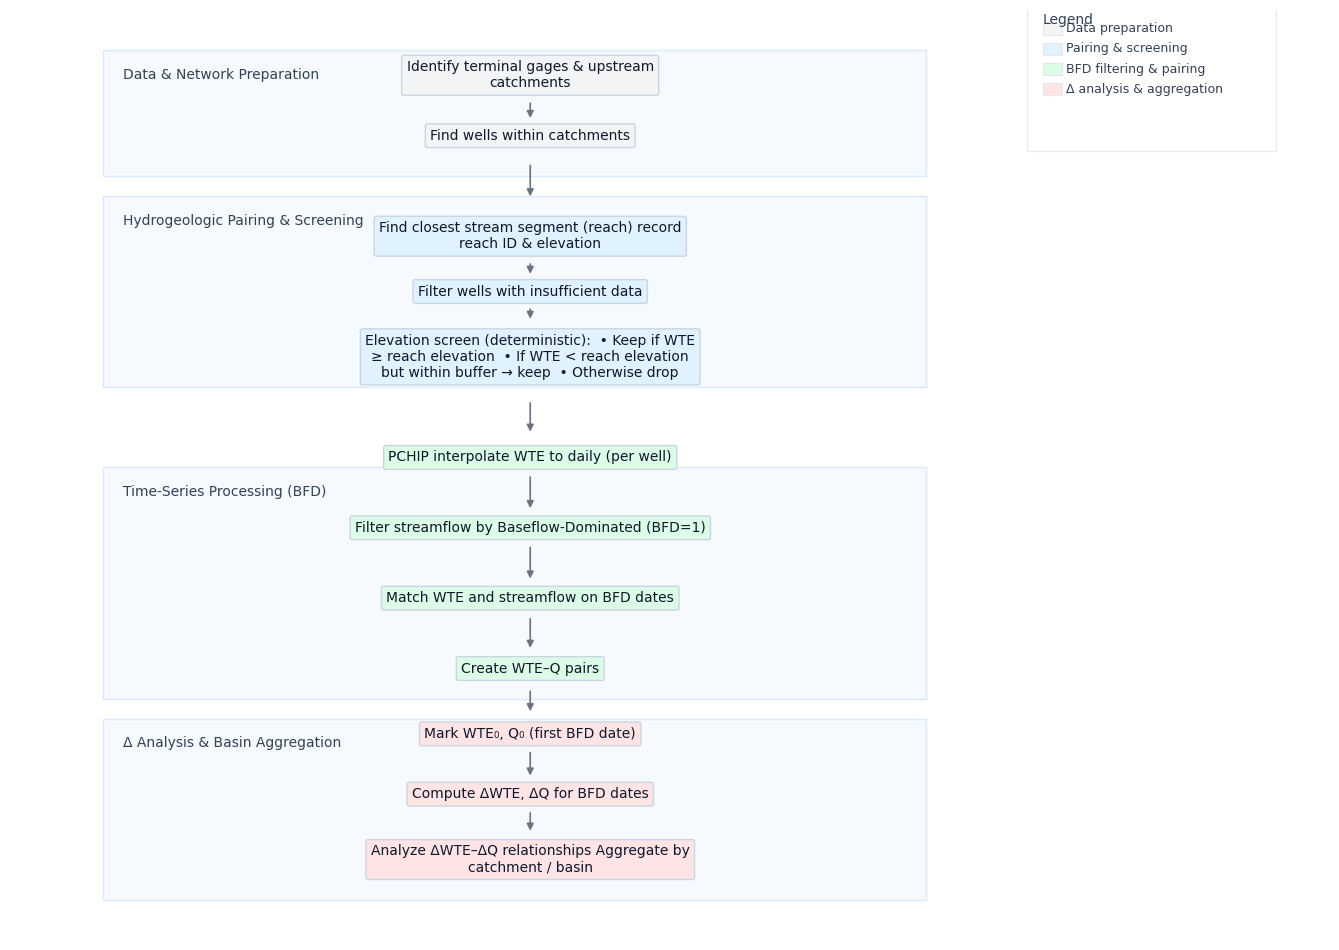

In [25]:
# -*- coding: utf-8 -*-
# GW–Baseflow Flowchart (Matplotlib, auto-sized boxes, no white nodes, deterministic blue rule)
# - Remove all white decision/result nodes (no Yes/No/Keep/Drop/Within buffer)
# - Blue last box → deterministic rule description (no branching)
# - Green (BFD) boxes slightly longer; connectors slightly longer
# - Display only (no save)

import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
from matplotlib.patches import Rectangle

plt.rcParams.update({
    "font.family": "DejaVu Sans",  # supports ≥, Δ
    "font.size": 10
})

# --------- Palette ---------
COL = {
    "prep":  "#f3f4f6",   # gray: data prep
    "pair":  "#e0f2fe",   # blue: pairing & screening
    "bfd":   "#dcfce7",   # green: BFD
    "delta": "#ffe4e6",   # pink: delta analysis
    "arrow": "#6b7280",
    "group_edge": "#bfdbfe",
    "group_fill": "#eff6ff",
    "legend_border": "#e5e7eb",
    "text": "#0f172a",
}

# --------- Helpers ---------
def add_cell(ax, x, y, text, face, pad=0.35, linewidth=1.0, round_sz=0.15, wrap_chars=40, fontsize=10):
    """Create an auto-sized rounded box using text bbox; return geometry dict."""
    import textwrap
    wrapped = "\n".join(textwrap.wrap(text, width=wrap_chars, break_long_words=False))
    t = ax.text(
        x, y, wrapped,
        ha="center", va="center", fontsize=fontsize, color=COL["text"],
        bbox=dict(boxstyle=f"round,pad={pad},rounding_size={round_sz}",
                  fc=face, ec="#cbd5e1", lw=linewidth)
    )
    fig = ax.figure
    fig.canvas.draw()
    bb_disp: Bbox = t.get_window_extent(renderer=fig.canvas.get_renderer())
    inv = ax.transData.inverted()
    bb = inv.transform_bbox(bb_disp)
    return {"text": t, "bbox": bb, "x": x, "y": y,
            "left": bb.x0, "right": bb.x1, "top": bb.y1, "bottom": bb.y0,
            "width": bb.width, "height": bb.height}

def connect_top_to_bottom(ax, upper, lower, gap=0.10, color=COL["arrow"], lw=1.2):
    ax.annotate("", xy=(lower["x"], lower["top"] + gap),
                xytext=(upper["x"], upper["bottom"] - gap),
                arrowprops=dict(arrowstyle="-|>", color=color, lw=lw))

def add_group(ax, x0, y0, w, h, label):
    ax.add_patch(Rectangle((x0, y0), w, h, linewidth=1.0,
                           edgecolor=COL["group_edge"], facecolor=COL["group_fill"], alpha=0.55))
    ax.text(x0+0.25, y0+h-0.35, label, ha="left", va="top", color="#334155", fontsize=10)

def add_legend(ax, x0=13.1, y0=15.7, w=3.2, h=3.1):
    ax.add_patch(Rectangle((x0, y0), w, h, linewidth=0.8,
                           edgecolor=COL["legend_border"], facecolor="white"))
    ax.text(x0+0.2, y0+h-0.35, "Legend", ha="left", va="top", fontsize=10, color="#334155")
    def sw(y, label, color):
        ax.add_patch(Rectangle((x0+0.2, y), 0.25, 0.25, linewidth=0.8,
                               edgecolor=COL["legend_border"], facecolor=color))
        ax.text(x0+0.5, y+0.125, label, va="center", ha="left", fontsize=9, color="#334155")
    sw(y0+h-0.8,  "Data preparation", COL["prep"])
    sw(y0+h-1.2,  "Pairing & screening", COL["pair"])
    sw(y0+h-1.6,  "BFD filtering & pairing", COL["bfd"])
    sw(y0+h-2.0,  "Δ analysis & aggregation", COL["delta"])

# --------- Canvas ---------
fig, ax = plt.subplots(figsize=(13.5, 9.6))
ax.set_xlim(0, 17)
ax.set_ylim(0.0, 18.5)
ax.axis("off")

# Columns
X_MAIN = 6.7

# Rows（加大组间距 → 箭头更长、更清晰）
Y = {
    "prep1": 17.2, "prep2": 16.0,
    "pair1": 14.0, "pair2": 12.9, "pair3": 11.6,  # pair3 为“确定性规则”
    "bfd1":  9.6,  "bfd2":  8.2,  "bfd3":  6.8,  "bfd4":  5.4,  # 稍微更长的绿色箭头（行距略增）
    "d1":    4.1,  "d2":    2.9,  "d3":    1.6
}

# --------- Group panels ---------
add_group(ax, 1.2, 15.2, 10.6, 2.5, "Data & Network Preparation")
add_group(ax, 1.2, 11.0, 10.6, 3.8, "Hydrogeologic Pairing & Screening")
add_group(ax, 1.2, 4.8,  10.6, 4.6, "Time-Series Processing (BFD)")
add_group(ax, 1.2, 0.8,  10.6, 3.6, "Δ Analysis & Basin Aggregation")

# --------- Cells（无白色节点 & 蓝色最后一个为确定性规则）---------
# Data prep
c1 = add_cell(ax, X_MAIN, Y["prep1"], "Identify terminal gages & upstream catchments", COL["prep"], wrap_chars=42)
c2 = add_cell(ax, X_MAIN, Y["prep2"], "Find wells within catchments", COL["prep"], wrap_chars=42)
connect_top_to_bottom(ax, c1, c2, gap=0.12)

# Pairing & Screening
c3 = add_cell(ax, X_MAIN, Y["pair1"], "Find closest stream segment (reach)\nrecord reach ID & elevation", COL["pair"], wrap_chars=44)
connect_top_to_bottom(ax, c2, c3, gap=0.36)   # 组间连线更长

c4 = add_cell(ax, X_MAIN, Y["pair2"], "Filter wells with insufficient data", COL["pair"], wrap_chars=44)
connect_top_to_bottom(ax, c3, c4, gap=0.12)

# 确定性规则（无分支）
rule_text = (
    "Elevation screen (deterministic):\n • Keep if WTE ≥ reach elevation\n • If WTE < reach elevation but within buffer → keep\n • Otherwise drop"
)
c5 = add_cell(ax, X_MAIN, Y["pair3"], rule_text, COL["pair"], wrap_chars=48)
connect_top_to_bottom(ax, c4, c5, gap=0.12)

# BFD（绿色盒子更“长一点” → wrap_chars 调大；箭头更长 → 行距略增 & gap略大）
wrap_bfd = 54
b1 = add_cell(ax, X_MAIN, Y["bfd1"], "PCHIP interpolate WTE to daily (per well)", COL["bfd"], wrap_chars=wrap_bfd)
connect_top_to_bottom(ax, c5, b1, gap=0.28)   # 从蓝到绿，箭头稍长

b2 = add_cell(ax, X_MAIN, Y["bfd2"], "Filter streamflow by Baseflow-Dominated (BFD=1)", COL["bfd"], wrap_chars=wrap_bfd)
connect_top_to_bottom(ax, b1, b2, gap=0.16)   # 绿色段内部箭头稍微更长

b3 = add_cell(ax, X_MAIN, Y["bfd3"], "Match WTE and streamflow on BFD dates", COL["bfd"], wrap_chars=wrap_bfd)
connect_top_to_bottom(ax, b2, b3, gap=0.16)

b4 = add_cell(ax, X_MAIN, Y["bfd4"], "Create WTE–Q pairs", COL["bfd"], wrap_chars=wrap_bfd)
connect_top_to_bottom(ax, b3, b4, gap=0.18)

# Δ analysis
d1 = add_cell(ax, X_MAIN, Y["d1"], "Mark WTE₀, Q₀ (first BFD date)", COL["delta"], wrap_chars=46)
connect_top_to_bottom(ax, b4, d1, gap=0.22)

d2 = add_cell(ax, X_MAIN, Y["d2"], "Compute ΔWTE, ΔQ for BFD dates", COL["delta"], wrap_chars=48)
connect_top_to_bottom(ax, d1, d2, gap=0.14)

d3 = add_cell(ax, X_MAIN, Y["d3"], "Analyze ΔWTE–ΔQ relationships\nAggregate by catchment / basin", COL["delta"], wrap_chars=48)
connect_top_to_bottom(ax, d2, d3, gap=0.14)

# Legend
add_legend(ax)

plt.tight_layout()
plt.show()


## Detailed Step-by-Step Visualization

In [ ]:
# Create individual step illustrations
import matplotlib.pyplot as plt
import numpy as np

def create_step_illustration(step_num, title, description):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.axis('off')

    # Title
    ax.text(5, 5.5, f'Step {step_num}: {title}', ha='center', va='center',
            fontsize=18, weight='bold')

    # Description
    ax.text(5, 4.5, description, ha='center', va='center',
            fontsize=12, wrap=True)

    return fig, ax

# Step 1: PHCIP Illustration
fig1, ax1 = create_step_illustration(
    3,
    'PHCIP Calculation',
    'Preliminary Hydrograph for Computation of Initial Points\nDetermines baseline conditions for each well'
)

# Add PHCIP visualization
# Create sample time series
x = np.linspace(0.5, 9.5, 100)
y_flow = 2.5 + 0.8 * np.sin(x * 2) + 0.3 * np.sin(x * 5) + np.random.normal(0, 0.1, 100)
y_wte = 2 + 0.5 * np.sin(x * 2 + 1) + 0.2 * np.sin(x * 4) + np.random.normal(0, 0.05, 100)

ax1.plot(x, y_flow, 'b-', linewidth=2, label='Streamflow (Q)', alpha=0.7)
ax1.plot(x, y_wte, 'g-', linewidth=2, label='Water Table Elevation (WTE)', alpha=0.7)

# Mark PHCIP points
phcip_points = [2, 4.5, 7.2]
for i, point in enumerate(phcip_points):
    idx = int(point * 10)
    ax1.plot(x[idx], y_flow[idx], 'ro', markersize=8, label='PHCIP Points' if i == 0 else '')
    ax1.plot(x[idx], y_wte[idx], 'ro', markersize=8)
    ax1.axvline(x[idx], color='red', linestyle='--', alpha=0.5)

ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.legend()
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()  # Changed from plt.savefig to plt.show()

# Step 2: BFD=1 Identification
fig2, ax2 = create_step_illustration(
    4,
    'BFD=1 Identification',
    'Identify Base Flow Days (BFD=1) - periods of stable baseflow conditions\nFirst occurrence per well establishes baseline'
)

# Create BFD illustration
x = np.linspace(0.5, 9.5, 50)
y = 2.5 + 0.8 * np.sin(x * 1.5) + 0.4 * np.sin(x * 3)

# Add noise and peaks for non-baseflow
storm_events = [15, 25, 35]
for storm in storm_events:
    y[storm:storm+3] += np.array([1.5, 2.0, 1.0])

ax2.plot(x, y, 'b-', linewidth=2, label='Streamflow')

# Mark BFD=1 periods (stable low flow)
bfd_periods = [(5, 12), (18, 22), (40, 47)]
for start, end in bfd_periods:
    ax2.fill_between(x[start:end], 0, y[start:end], alpha=0.3, color='green',
                    label='BFD=1 (Baseflow)' if start == 5 else '')

# Mark first BFD=1 occurrence
ax2.plot(x[5], y[5], 'ro', markersize=10, label='First BFD=1\n(Baseline Point)')
ax2.axvline(x[5], color='red', linestyle='--', alpha=0.7)
ax2.text(x[5], y[5] + 0.3, 'WTE₀, Q₀', ha='center', va='bottom',
         fontsize=10, weight='bold', color='red')

ax2.set_xlabel('Time')
ax2.set_ylabel('Streamflow')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()  # Changed from plt.savefig to plt.show()

print("✅ Step illustrations displayed directly in notebook!")

In [ ]:
# Step 3: Delta Calculation
fig3, ax3 = create_step_illustration(
    6,
    'Delta Calculation',
    'Calculate changes from baseline: Δ WTE = WTE - WTE₀, Δ Q = Q - Q₀\nThese deltas represent deviations from initial conditions'
)

# Create delta visualization
fig, (ax_orig, ax_delta) = plt.subplots(2, 1, figsize=(12, 8))

# Create sample data
x = np.linspace(0, 10, 30)
wte_original = 3 + 0.3 * np.sin(x * 2) + np.random.normal(0, 0.05, 30)
q_original = 2 + 0.5 * np.sin(x * 2 + 0.5) + np.random.normal(0, 0.08, 30)

# Mark baseline (first point)
wte0, q0 = wte_original[0], q_original[0]

# Calculate deltas
delta_wte = wte_original - wte0
delta_q = q_original - q0

# Plot original values
ax_orig.plot(x, wte_original, 'g-', linewidth=2, label='WTE (original)')
ax_orig.plot(x, q_original, 'b-', linewidth=2, label='Q (original)')
ax_orig.axhline(wte0, color='green', linestyle='--', alpha=0.7, label='WTE₀')
ax_orig.axhline(q0, color='blue', linestyle='--', alpha=0.7, label='Q₀')
ax_orig.set_ylabel('Original Values')
ax_orig.legend()
ax_orig.grid(True, alpha=0.3)
ax_orig.set_title('Step 6: Delta Calculation', fontsize=16, weight='bold')

# Plot delta values
ax_delta.plot(x, delta_wte, 'g-', linewidth=2, label='Δ WTE')
ax_delta.plot(x, delta_q, 'b-', linewidth=2, label='Δ Q')
ax_delta.axhline(0, color='black', linestyle='-', alpha=0.5)
ax_delta.set_xlabel('Time')
ax_delta.set_ylabel('Delta Values')
ax_delta.legend()
ax_delta.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()  # Changed from plt.savefig to plt.show()

# Step 4: Lag Analysis
fig4, ax4 = create_step_illustration(
    7,
    'Lag Analysis',
    'Time-shifted correlation analysis\nCompare current Q with past WTE (1yr, 2yr, 3yr, 6mo, 3mo lags)'
)

# Create lag illustration
time = np.arange(0, 50)
signal = np.sin(time * 0.3) + 0.5 * np.sin(time * 0.1)

ax4.plot(time, signal, 'b-', linewidth=2, label='Original WTE signal')
ax4.plot(time, np.roll(signal, 5), 'r--', linewidth=2, label='1-year lag')
ax4.plot(time, np.roll(signal, 10), 'g--', linewidth=2, label='2-year lag')
ax4.plot(time, np.roll(signal, 2), 'm--', linewidth=2, label='6-month lag')

ax4.set_xlabel('Time')
ax4.set_ylabel('WTE Signal')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_title('Step 7: Time-lagged WTE signals for correlation analysis', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()  # Changed from plt.savefig to plt.show()

print("✅ Additional step illustrations displayed directly in notebook!")

# bfd=1 pair

/var/folders/fk/mzjttwrn7rn5nvcfhpgm4mrc0000gq/T/ipykernel_9718/776081502.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


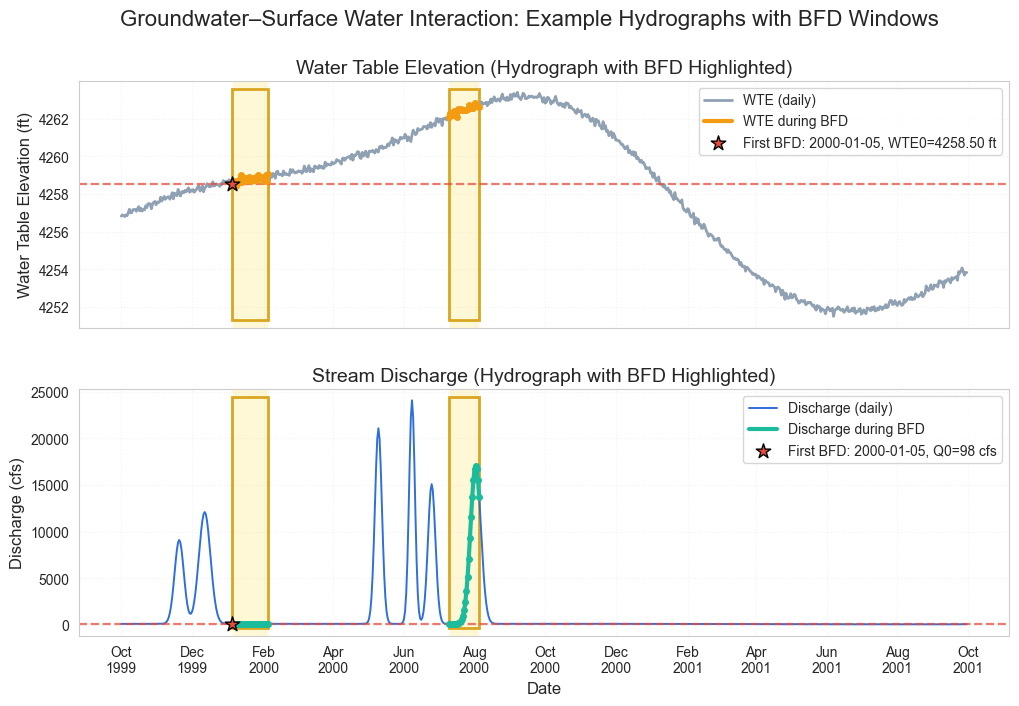

In [6]:
# -*- coding: utf-8 -*-
"""
Two-panel hydrograph with synthetic example data:
- Both panels have full hydrograph lines (smooth baseline + sharp peaks)
- BFD=1 dates are highlighted (points + thick line)
- Each BFD window is 'boxed' (filled span + framed rectangle)
- First BFD date is starred; dashed reference lines at WTE0 and Q0

Requires: numpy, pandas, matplotlib
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import dates as mdates
from matplotlib.transforms import blended_transform_factory as blend

# ----------------------------- 1) Build example data ----------------------------- #
# Date range ~2 years, daily
date = pd.date_range("1999-10-01", "2001-09-30", freq="D")
n = len(date)
t = np.linspace(0, 2*np.pi, n)

rng = np.random.default_rng(7)

# --- Water table elevation (ft): very smooth seasonal + gentle mound
wte_base = 4256.8 + 4.0*np.sin(0.9*t - 0.3) + 1.2*np.cos(1.8*t)
wte_mound = 3.0*np.exp(-0.5*((t-3.2)/0.8)**2)
wte = wte_base + wte_mound + rng.normal(0, 0.12, n)

# --- Discharge (cfs): smooth low baseline + several sharp peaks (gaussian pulses)
q_base = 80 + 20*np.sin(0.8*t) + 10*np.cos(1.6*t)
# Define flood peaks: (date, amplitude, width_in_days)
peaks = [
    ("1999-11-20",  9000,  4),
    ("1999-12-12", 12000,  5),
    ("2000-05-10", 21000,  3),
    ("2000-06-08", 24000,  2.5),
    ("2000-06-25", 15000,  3.2),
    ("2000-08-02", 17000,  4.5),
]
q = q_base.copy().astype(float)
t_num = mdates.date2num(date)
for d, amp, w in peaks:
    mu = mdates.date2num(pd.Timestamp(d))
    q += amp * np.exp(-0.5*((t_num - mu)/w)**2)

# Tiny noise to avoid flatness
q += rng.normal(0, 3.0, n)
q = np.clip(q, 0, None)

# --- Baseflow-dominant windows you want to highlight (edit as needed)
bfd_windows = [
    (pd.Timestamp("2000-01-05"), pd.Timestamp("2000-02-05")),
    (pd.Timestamp("2000-07-10"), pd.Timestamp("2000-08-05")),
]

# Boolean mask for BFD dates
bfd = pd.Series(False, index=date)
for s, e in bfd_windows:
    bfd.loc[(date >= s) & (date <= e)] = True
bfd = bfd.values

# First BFD date and reference values
first_idx = np.argmax(bfd) if bfd.any() else None
first_date = date[first_idx] if (first_idx is not None and bfd[first_idx]) else None
wte0 = wte[first_idx] if first_date is not None else None
q0 = q[first_idx] if first_date is not None else None

# Mask series to draw thicker colored BFD line segments
def mask_segments(series, mask):
    arr = np.array(series, float)
    arr[~mask] = np.nan
    return arr

wte_bfd = mask_segments(wte, bfd)
q_bfd   = mask_segments(q, bfd)

# ----------------------------- 2) Plot ----------------------------- #
plt.rcParams.update({
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 10,
})

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 7.2), sharex=True,
                               gridspec_kw=dict(hspace=0.25))

# Helper to add filled span + framed box for BFD windows (FIX for your error)
def add_bfd_boxes(ax, windows, face="gold", edge="goldenrod", alpha=0.16, ypad=(0.03, 0.03)):
    """
    Draw a semi-transparent fill (axvspan) and a full-height rectangle frame for each window.
    Uses blended transform: x in data coords (dates), y in axes coords (0-1).
    """
    trans = blend(ax.transData, ax.transAxes)
    for s, e in windows:
        ax.axvspan(s, e, facecolor=face, alpha=alpha, zorder=0.5)
        # Rectangle frame in x=data, y=axes coordinates
        x0 = mdates.date2num(pd.to_datetime(s))
        x1 = mdates.date2num(pd.to_datetime(e))
        rect = Rectangle(
            (x0, 0.0 + ypad[0]),  # lower-left in (x_data, y_axes)
            width=x1 - x0,
            height=1.0 - sum(ypad),
            fill=False, edgecolor=edge, linewidth=2, transform=trans, zorder=0.6
        )
        ax.add_patch(rect)

# ---- Top: WTE hydrograph ----
ax1.plot(date, wte, color="#8FA1B3", lw=2.0, label="WTE (daily)")
ax1.plot(date, wte_bfd, color="#F39C12", lw=3.0, label="WTE during BFD")
ax1.scatter(date[bfd], wte[bfd], s=16, color="#F39C12", zorder=3)

add_bfd_boxes(ax1, bfd_windows)

if first_date is not None:
    ax1.scatter([first_date], [wte0], s=120, marker="*", color="#E74C3C",
                edgecolor="k", zorder=4, label=f"First BFD: {first_date.date()}, WTE0={wte0:.2f} ft")
    ax1.axhline(wte0, ls="--", lw=1.6, color="#E74C3C", alpha=0.75)

ax1.set_ylabel("Water Table Elevation (ft)")
ax1.set_title("Water Table Elevation (Hydrograph with BFD Highlighted)")
ax1.grid(True, alpha=0.25, linestyle=":")

# ---- Bottom: Q hydrograph ----
ax2.plot(date, q, color="#2E6FDB", lw=1.4, label="Discharge (daily)")       # thin blue like USGS
ax2.plot(date, q_bfd, color="#1ABC9C", lw=3.0, label="Discharge during BFD")
ax2.scatter(date[bfd], q[bfd], s=16, color="#1ABC9C", zorder=3)

add_bfd_boxes(ax2, bfd_windows)

if first_date is not None:
    ax2.scatter([first_date], [q0], s=120, marker="*", color="#E74C3C",
                edgecolor="k", zorder=4, label=f"First BFD: {first_date.date()}, Q0={q0:.0f} cfs")
    ax2.axhline(q0, ls="--", lw=1.6, color="#E74C3C", alpha=0.75)

ax2.set_ylabel("Discharge (cfs)")
ax2.set_xlabel("Date")
ax2.set_title("Stream Discharge (Hydrograph with BFD Highlighted)")
ax2.grid(True, alpha=0.25, linestyle=":")

# Format x-axis like USGS style (month ticks)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))

# Legends
ax1.legend(loc="upper right", frameon=True)
ax2.legend(loc="upper right", frameon=True)

fig.suptitle("Groundwater–Surface Water Interaction: Example Hydrographs with BFD Windows",
             y=0.98, fontsize=16)

plt.tight_layout()
plt.show()
# fig.savefig("hydrograph_bfd_example.png", dpi=300, bbox_inches="tight")


findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

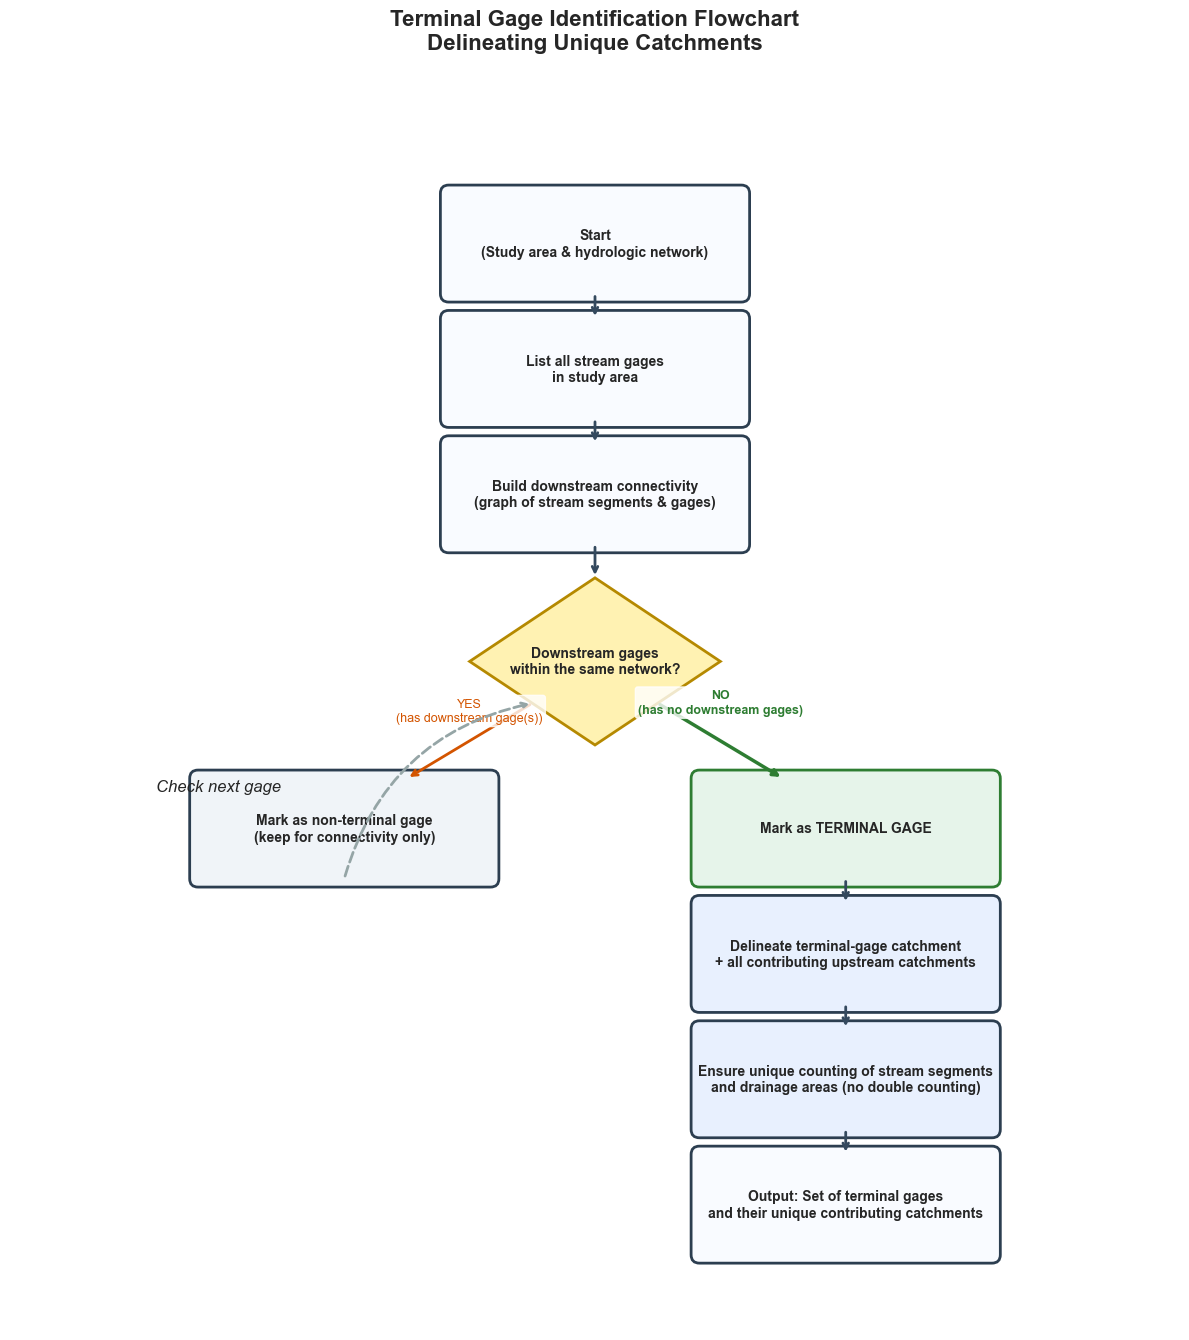

✅ Terminal gage flowchart displayed


In [39]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch

def create_terminal_gage_flowchart():
    """
    Create flowchart using matplotlib to identify terminal gages and delineate catchments
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 14))
    
    # Colors
    colors = {
        'process': '#F9FBFF',      # Light blue for process boxes
        'decision': '#FFF2B2',     # Yellow for decision diamond
        'terminal': '#E6F4EA',     # Light green for terminal
        'non_terminal': '#F0F4F8', # Light gray for non-terminal
        'delineate': '#E8F0FE',    # Light blue for delineation
        'border': '#2C3E50',       # Dark blue for borders
        'decision_border': '#B58900', # Orange for decision border
        'terminal_border': '#2E7D32'  # Green for terminal border
    }
    
    # Box positions and sizes
    box_width = 3.5
    box_height = 1.2
    diamond_size = 2.0
    
    # Define nodes with positions
    nodes = [
        # (x, y, width, height, text, color, border_color, shape)
        (6, 12, box_width, box_height, "Start\n(Study area & hydrologic network)", 
         colors['process'], colors['border'], 'box'),
        
        (6, 10.5, box_width, box_height, "List all stream gages\nin study area", 
         colors['process'], colors['border'], 'box'),
        
        (6, 9, box_width, box_height, "Build downstream connectivity\n(graph of stream segments & gages)", 
         colors['process'], colors['border'], 'box'),
        
        (6, 7, diamond_size*1.5, diamond_size, "Downstream gages\nwithin the same network?", 
         colors['decision'], colors['decision_border'], 'diamond'),
        
        # Branches
        (3, 5, box_width, box_height, "Mark as non-terminal gage\n(keep for connectivity only)", 
         colors['non_terminal'], colors['border'], 'box'),
        
        (9, 5, box_width, box_height, "Mark as TERMINAL GAGE", 
         colors['terminal'], colors['terminal_border'], 'box'),
        
        (9, 3.5, box_width, box_height, "Delineate terminal-gage catchment\n+ all contributing upstream catchments", 
         colors['delineate'], colors['border'], 'box'),
        
        (9, 2, box_width, box_height, "Ensure unique counting of stream segments\nand drainage areas (no double counting)", 
         colors['delineate'], colors['border'], 'box'),
        
        (9, 0.5, box_width, box_height, "Output: Set of terminal gages\nand their unique contributing catchments", 
         colors['process'], colors['border'], 'box'),
    ]
    
    # Draw nodes
    for x, y, width, height, text, facecolor, edgecolor, shape in nodes:
        if shape == 'diamond':
            # Create diamond shape
            diamond = patches.Polygon([
                (x, y + height/2),      # top
                (x + width/2, y),       # right
                (x, y - height/2),      # bottom
                (x - width/2, y)        # left
            ], closed=True, facecolor=facecolor, edgecolor=edgecolor, linewidth=2)
            ax.add_patch(diamond)
        else:
            # Create rounded rectangle
            box = FancyBboxPatch((x - width/2, y - height/2), width, height,
                               boxstyle="round,pad=0.1", 
                               facecolor=facecolor, edgecolor=edgecolor, linewidth=2)
            ax.add_patch(box)
        
        # Add text
        ax.text(x, y, text, fontsize=10, ha='center', va='center', 
               fontweight='bold', wrap=True)
    
    # Draw arrows
    arrows = [
        # (start_x, start_y, end_x, end_y, label)
        (6, 11.4, 6, 11.1, ""),                    # start -> list_gages
        (6, 9.9, 6, 9.6, ""),                      # list_gages -> build_graph
        (6, 8.4, 6, 8, ""),                        # build_graph -> decision
        (5.25, 6.5, 3.75, 5.6, "YES\n(has downstream gage(s))"),    # decision -> non_terminal
        (6.75, 6.5, 8.25, 5.6, "NO\n(has no downstream gages)"),     # decision -> terminal
        (9, 4.4, 9, 4.1, ""),                      # terminal -> delineate
        (9, 2.9, 9, 2.6, ""),                      # delineate -> dedup
        (9, 1.4, 9, 1.1, ""),                      # dedup -> output
        (3, 4.4, 3, 0.5, ""),                      # non_terminal loop (placeholder)
    ]
    
    for start_x, start_y, end_x, end_y, label in arrows:
        if start_x == 3 and end_y == 0.5:  # Special case for loop back
            # Draw curved arrow back to decision
            ax.annotate('', xy=(5.25, 6.5), xytext=(3, 4.4),
                       arrowprops=dict(arrowstyle='->', lw=2, color='#95A5A6',
                                     connectionstyle="arc3,rad=-0.3", linestyle='dashed'))
            ax.text(1.5, 5.5, "Check next gage", fontsize=12,
                   ha='center', va='center', style='italic')
        else:
            # Regular straight arrow
            arrow_color = '#2E7D32' if 'NO' in label else '#D35400' if 'YES' in label else '#34495E'
            arrow_width = 2.5 if 'NO' in label else 2
            
            ax.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y),
                       arrowprops=dict(arrowstyle='->', lw=arrow_width, color=arrow_color))
            
            # Add label if exists
            if label:
                mid_x = (start_x + end_x) / 2
                mid_y = (start_y + end_y) / 2
                offset_y = 0.2 if 'YES' in label else 0.3
                ax.text(mid_x, mid_y + offset_y, label, fontsize=9, ha='center', va='bottom',
                       bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8),
                       color=arrow_color, fontweight='bold' if 'NO' in label else 'normal')
    
    # Add title
    ax.set_title('Terminal Gage Identification Flowchart\nDelineating Unique Catchments', 
                fontsize=16, fontweight='bold', pad=20)
    
    # # Add notes
    # notes_text = """
    # Key Concepts:
    # • Terminal Gages: Stream gages with no downstream gages in the same network
    # • Unique Catchments: Non-overlapping drainage areas for each terminal gage
    # • Network Connectivity: Based on stream segment linkages (LINKNO → DSLINKNO)
    # """
    #
    # ax.text(0.02, 0.02, notes_text, transform=ax.transAxes, fontsize=10,
    #        bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.8),
    #        verticalalignment='bottom')
    #
    # Set axis properties
    ax.set_xlim(-1, 13)
    ax.set_ylim(-1, 14)
    ax.set_aspect('equal')
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Terminal gage flowchart displayed")

# Create the flowchart
create_terminal_gage_flowchart()

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

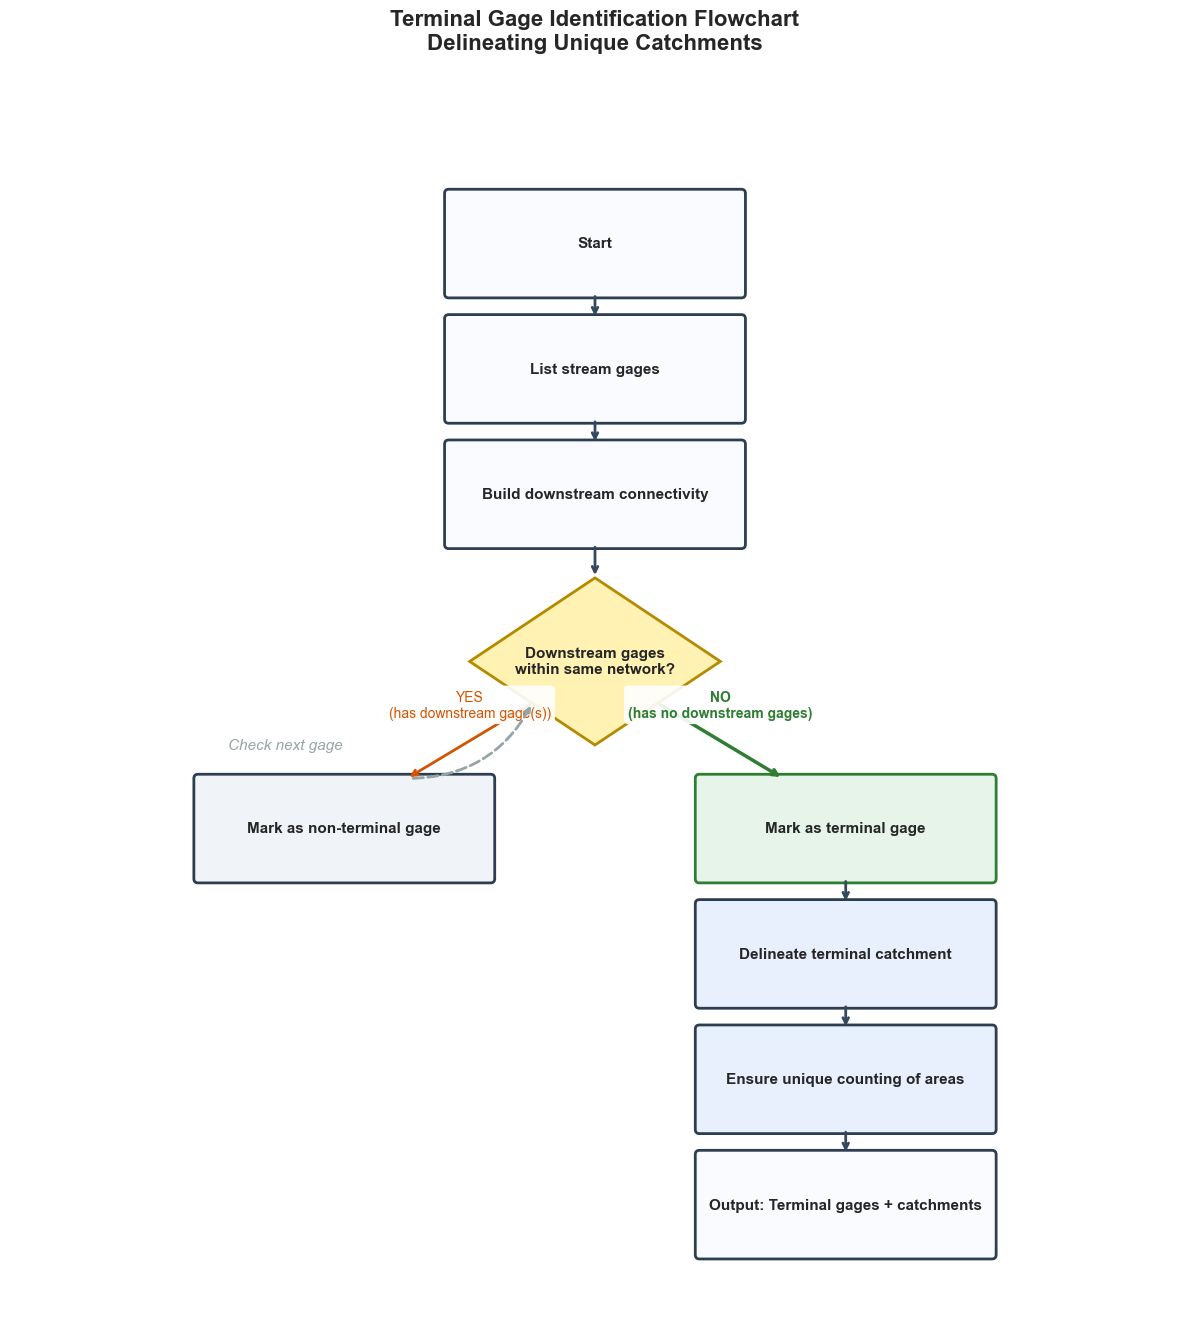

✅ Terminal gage flowchart displayed (gray loop adjusted)


In [42]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch

def create_terminal_gage_flowchart():
    """
    Create flowchart using matplotlib to identify terminal gages and delineate catchments
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 14))

    # Colors
    colors = {
        'process': '#F9FBFF',      # Light blue for process boxes
        'decision': '#FFF2B2',     # Yellow for decision diamond
        'terminal': '#E6F4EA',     # Light green for terminal
        'non_terminal': '#F0F4F8', # Light gray for non-terminal
        'delineate': '#E8F0FE',    # Light blue for delineation
        'border': '#2C3E50',       # Dark blue for borders
        'decision_border': '#B58900', # Orange for decision border
        'terminal_border': '#2E7D32'  # Green for terminal border
    }

    # Box positions and sizes
    box_width = 3.5
    box_height = 1.2
    diamond_size = 2.0

    # Define nodes with positions
    nodes = [
        (6, 12, box_width, box_height, "Start",
         colors['process'], colors['border'], 'box'),

        (6, 10.5, box_width, box_height, "List stream gages",
         colors['process'], colors['border'], 'box'),

        (6, 9, box_width, box_height, "Build downstream connectivity",
         colors['process'], colors['border'], 'box'),

        (6, 7, diamond_size*1.5, diamond_size, "Downstream gages\nwithin same network?",
         colors['decision'], colors['decision_border'], 'diamond'),

        # Branches
        (3, 5, box_width, box_height, "Mark as non-terminal gage",
         colors['non_terminal'], colors['border'], 'box'),

        (9, 5, box_width, box_height, "Mark as terminal gage",
         colors['terminal'], colors['terminal_border'], 'box'),

        (9, 3.5, box_width, box_height, "Delineate terminal catchment",
         colors['delineate'], colors['border'], 'box'),

        (9, 2, box_width, box_height, "Ensure unique counting of areas",
         colors['delineate'], colors['border'], 'box'),

        (9, 0.5, box_width, box_height, "Output: Terminal gages + catchments",
         colors['process'], colors['border'], 'box'),
    ]

    # Draw nodes
    for x, y, width, height, text, facecolor, edgecolor, shape in nodes:
        if shape == 'diamond':
            diamond = patches.Polygon([
                (x, y + height/2),
                (x + width/2, y),
                (x, y - height/2),
                (x - width/2, y)
            ], closed=True, facecolor=facecolor, edgecolor=edgecolor, linewidth=2)
            ax.add_patch(diamond)
        else:
            box = FancyBboxPatch((x - width/2, y - height/2), width, height,
                               boxstyle="round,pad=0.05",
                               facecolor=facecolor, edgecolor=edgecolor, linewidth=2)
            ax.add_patch(box)

        ax.text(x, y, text, fontsize=11, ha='center', va='center',
               fontweight='semibold', wrap=True)

    # Draw arrows
    arrows = [
        (6, 11.4, 6, 11.1, ""),
        (6, 9.9, 6, 9.6, ""),
        (6, 8.4, 6, 8, ""),
        (5.25, 6.5, 3.75, 5.6, "YES\n(has downstream gage(s))"),
        (6.75, 6.5, 8.25, 5.6, "NO\n(has no downstream gages)"),
        (9, 4.4, 9, 4.1, ""),
        (9, 2.9, 9, 2.6, ""),
        (9, 1.4, 9, 1.1, ""),
    ]

    for start_x, start_y, end_x, end_y, label in arrows:
        arrow_color = '#2E7D32' if 'NO' in label else '#D35400' if 'YES' in label else '#34495E'
        arrow_width = 2.5 if 'NO' in label else 2

        ax.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y),
                   arrowprops=dict(arrowstyle='->', lw=arrow_width, color=arrow_color))

        if label:
            mid_x = (start_x + end_x) / 2
            mid_y = (start_y + end_y) / 2
            offset_y = 0.25
            ax.text(mid_x, mid_y + offset_y, label, fontsize=10, ha='center', va='bottom',
                   bbox=dict(boxstyle="round,pad=0.25", facecolor='white', alpha=0.9),
                   color=arrow_color, fontweight='bold' if 'NO' in label else 'normal')

    # ✅ Modified dashed gray loop (same start & end as orange arrow)
    ax.annotate('', xy=(3.75, 5.6), xytext=(5.25, 6.5),
               arrowprops=dict(arrowstyle='<-', lw=2, color='#95A5A6',
                             connectionstyle="arc3,rad=-0.3", linestyle='dashed'))
    ax.text(2.3, 6.0, "Check next gage", fontsize=11,
           ha='center', va='center', color='#95A5A6', style='italic')

    # Title
    ax.set_title('Terminal Gage Identification Flowchart\nDelineating Unique Catchments',
                fontsize=16, fontweight='bold', pad=20)

    ax.set_xlim(-1, 13)
    ax.set_ylim(-1, 14)
    ax.set_aspect('equal')
    ax.axis('off')

    plt.tight_layout()
    plt.show()
    print("✅ Terminal gage flowchart displayed (gray loop adjusted)")

# Run
create_terminal_gage_flowchart()


# new